# Key Factors for a better income 
## by Rosario Padilla

## Investigation Overview

In this investigation, I wanted to look for the main factors in life that could be used to determine the income (<=50K, >50K) of a person. The main focus was on three aspects: Age, hours per week and education.

## Dataset Overview

The data consisted in demographical characterístics of 33,563 people. The atributes included the variables previously mentioned, as well as other characteristics such as occupation, workclass, marital_status, among others. 

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [79]:
# load in the dataset into a pandas dataframe
income = pd.read_csv('income.csv')
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33563 entries, 0 to 33562
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 33563 non-null  int64  
 1   workclass           31668 non-null  object 
 2   fnlwgt              33563 non-null  int64  
 3   education           33563 non-null  object 
 4   education_num       33563 non-null  int64  
 5   marital_status      33563 non-null  object 
 6   occupation          31661 non-null  object 
 7   relationship        33563 non-null  object 
 8   race                33563 non-null  object 
 9   sex                 33563 non-null  object 
 10  capital_gain        33563 non-null  float64
 11  capital_loss        33563 non-null  float64
 12  hours_per_week      33563 non-null  float64
 13  native_country      32965 non-null  object 
 14  income              33563 non-null  object 
 15  age_cat             33563 non-null  object 
 16  hour

In [80]:
#Sorting education values
edu_classes = ['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th','HS-grad',
               'Prof-school','Assoc-acdm','Assoc-voc','Some-college','Bachelors','Masters','Doctorate']
eclasses=pd.api.types.CategoricalDtype(ordered=True,categories=edu_classes)
income.education=income.education.astype(eclasses)
income.education.unique()

['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th', ..., 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool']
Length: 16
Categories (16, object): ['Preschool' < '1st-4th' < '5th-6th' < '7th-8th' ... 'Some-college' < 'Bachelors' < 'Masters' < 'Doctorate']

In [81]:
#Sorting hours per week values
hours_classes = ['Part-time','Full-time','Overtime','Excessive']
hclasses=pd.api.types.CategoricalDtype(ordered=True,categories=hours_classes)
income.hours_per_week_cat=income.hours_per_week_cat.astype(hclasses)
income.hours_per_week_cat.unique()

['Full-time', 'Overtime', 'Part-time', 'Excessive']
Categories (4, object): ['Part-time' < 'Full-time' < 'Overtime' < 'Excessive']

In [82]:
#Sorting Age values
age_classes = ['Young','Middle-Age','Senior','Elderly']
aclasses=pd.api.types.CategoricalDtype(ordered=True,categories=age_classes)
income.age_cat=income.age_cat.astype(aclasses)
income.age_cat.unique()

['Young', 'Middle-Age', 'Senior', 'Elderly']
Categories (4, object): ['Young' < 'Middle-Age' < 'Senior' < 'Elderly']

## Distribution of Income

We can observe that in this dataset, people earning more than 50K isn't frequent, as 76% of the people less than 50k dollars, leaving only 24% of them earning more than 50k dollars per year.

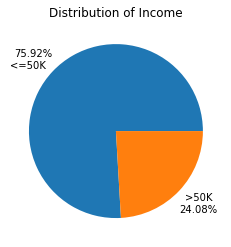

In [83]:
income_counts = income.income.value_counts()
plt.pie(income_counts, autopct=lambda p:f'{p:.2f}%', pctdistance = 1.3, labels = income_counts.index);
plt.title('Distribution of Income');

## Income by Age, Hours per week and education 

This plots demonstrate that these three variables are determinant factors for the income to be less or greater than 50K. As we can see it is more probable that people from around 45 years old, that works more than 40 hours per week and with higher education numerical representation earn more than 50K per year.

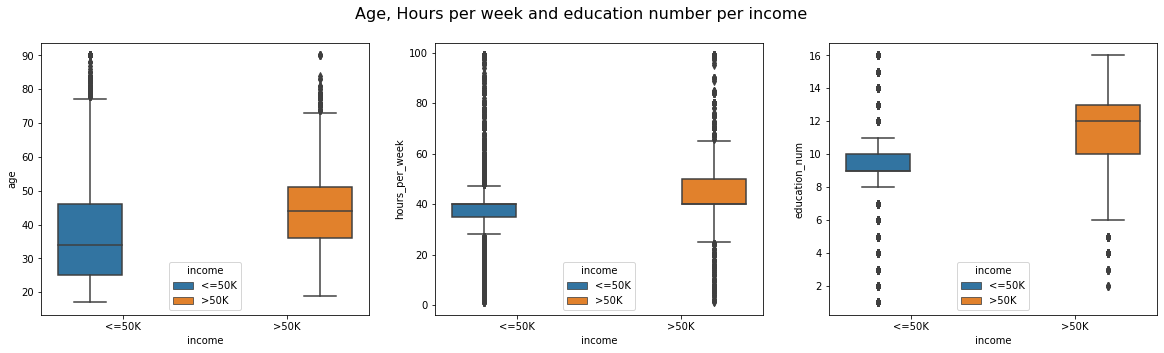

In [84]:
fig, ax = plt.subplots(ncols=3, figsize = [20,5])
fig.suptitle('Age, Hours per week and education number per income', fontsize=16)
sb.boxplot(data = income, x = 'income', y = 'age', hue = 'income', ax = ax[0])
sb.boxplot(data = income, x = 'income', y = 'hours_per_week', hue = 'income', ax = ax[1])
sb.boxplot(data = income, x = 'income', y = 'education_num', hue = 'income', ax = ax[2]);

We can see it as well in their normal representation as Age, hours per week and income category. As we can observe, in proportion the ones who tend to earn more are people considered senior. When talking about hours per week, people who work over time but not excessively, in this case more than 40 hours but less than 60. Finally, we can see that from the people who has studied in professional schools, Doctorates and masters, more than 50% of each earn more than 50K.

In [86]:
#Function to plot bar percentages of a nominal variable per income category
def percent_per_income(var,data = income,orientation = 'vertical'):
    var_data = data.groupby(var)['income'].value_counts(normalize = True)
    var_data = var_data.mul(100).rename('Percent').reset_index()
    return var_data

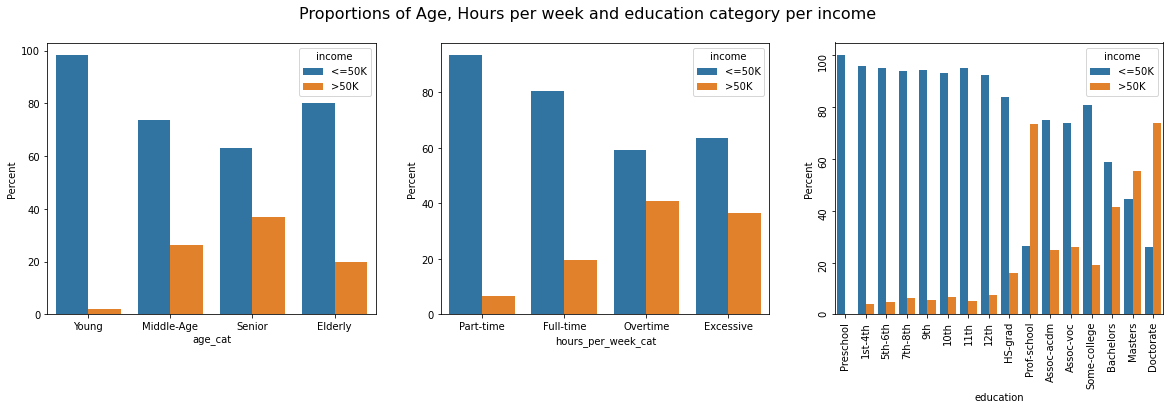

In [93]:
fig, ax = plt.subplots(ncols=3, figsize = [20,5])
fig.suptitle('Proportions of Age, Hours per week and education category per income', fontsize=16)
sb.barplot(x='age_cat', y="Percent", hue="income", data=percent_per_income('age_cat'), ax = ax[0])
sb.barplot(x='hours_per_week_cat', y="Percent", hue="income", data=percent_per_income('hours_per_week_cat'),ax = ax[1])
sb.barplot(x='education', y="Percent", hue="income", data=percent_per_income('education'),ax = ax[2]);
ax[2].tick_params(rotation = 90)

## Examples of interes

Finally, we can see two examples of occupations were age and education impact critically in their income. For instance, observing the occupation Armed Forces, we can see that the between the two types of income, there is an important difference in age and in education number. We could say that people who are about 45 and have higher education, are more probable to earn more than 50K, which makes sense if you consider higher positions like General. 

Another example can be seen in private houses services, were we can see a difference of around 6 points in average between earning less than 50K or more.

Lastly, we can see another example of hours per week, but now in the occupation of Sales, which again makes sense, if you work extra hours give you more opportunities to sell more. 

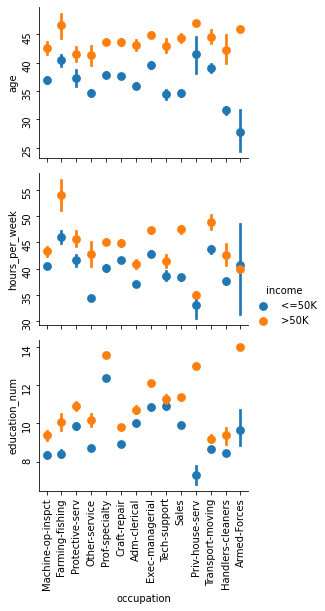

In [145]:
g = sb.PairGrid(data = income, y_vars = ['age','hours_per_week','education_num'], x_vars = ['occupation'],
                aspect = 1.5, hue='income');
g.map(sb.pointplot, join = False);
g.add_legend();
for ax in g.axes.flatten():
    ax.tick_params(rotation = 90);

In [153]:
# Use this command if you are running this file in local
!jupyter nbconvert Project_Income_Part2.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Project_Income_Part2.ipynb to slides
[NbConvertApp] Writing 685424 bytes to Project_Income_Part2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Rosario\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Rosario\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Rosario\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\Rosario\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "C:\Users\Rosario\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 518, in convert_notebooks
    self.convert_single_notebook(notebook_file